In [1]:
# load pretty jupyter's magics
%load_ext pretty_jupyter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib
import graphviz
from IPython.display import display,HTML,Image
from IPython.display import Markdown as md
from diagrams import Diagram,Cluster,Edge
from diagrams import aws
from diagrams.aws import analytics as aws_analytics
from diagrams.aws import network as aws_network
from diagrams.aws import compute as aws_compute
from diagrams.aws import database as aws_database
from diagrams.onprem import vcs
import fcgadgets.bc1ha.bc1ha_utils as u1ha
import fcgadgets.bc1ha.bc1ha_plot as p1ha
import fcgadgets.cbrunner.cbrun as cbr
import fcgadgets.cbrunner.cbrun_util as cbu
import fcgadgets.macgyver.util_fcs_graphs as ufcs
import fcgadgets.macgyver.util_fcs_qa as qa
import fcgadgets.macgyver.util_general as gu
import fcgadgets.macgyver.util_gis as gis
import fcgadgets.macgyver.util_inventory as uinv
import fcgadgets.macgyver.util_demo as udem
import fcgadgets.macgyver.util_nm as unm

In [3]:
# Export
# jupyter nbconvert "G:\My Drive\Code_Python\bc-fcs\documentation\BCFCS_ForestNutrientManagement.ipynb" --to=html --template pj

In [4]:
# Prepare session
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
display(HTML("<style>.container { width:80% !important; } .output {align-items:center; }</style>"))
warnings.filterwarnings('ignore')

In [5]:
# Import project information
meta=u1ha.Init()
meta['Paths']['Text']={'Text':meta['Paths']['Projects']['BC-FCS']['Documentation'] + '\\BCFCS Forest Nutrient Management.docx'}
meta['Graphics']['Print Figures']='On'
meta['Graphics']['Show Maps']='On'

In [6]:
# Import data
gdf_prov=u1ha.Import_GDBs_ProvinceWide(meta)
roi={'Type':'Prov','Name':'Prov'}
meta['Graphics']['Map']['RGSF']=5 # Reduce resolution of maps to preserve memory
meta,roi=u1ha.DefineROI(meta,roi,gdf_prov)
roi=u1ha.Import_Raster(meta,roi,['lc_comp1_2019'])

In [7]:
txt=ufcs.ImportText(meta,'Text')
txt=ufcs.AddParagraphs(txt,4)

In [8]:
txt=ufcs.AddParagraphs(txt,7)

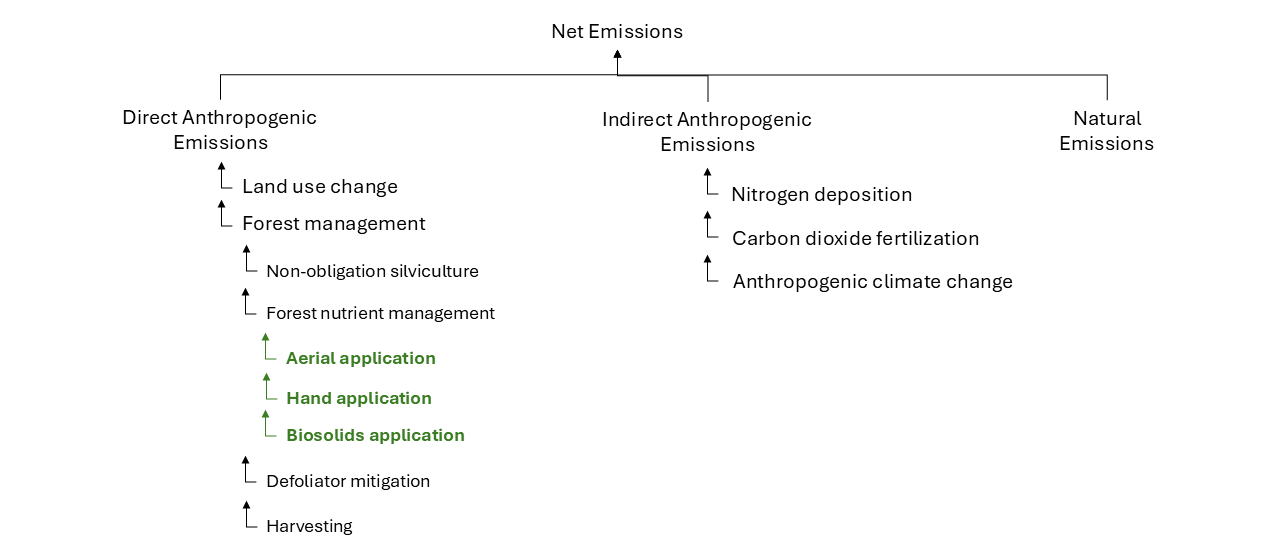

<b>Figure 1</b>. The nutrient management action category as it relates to estimation of total direct anthropogenic emissions.

In [9]:
display(Image(filename='images\FNM_Taxonomy.png',width=1000))
meta=ufcs.FigureCaption(meta,'The nutrient management action category as it relates to estimation of total direct anthropogenic emissions.')

In [10]:
txt=ufcs.AddParagraphs(txt,4)

In [11]:
txt=ufcs.AddParagraphs(txt,6)

In [12]:
meta=ufcs.TableCaption(meta,'Data sources contributing to model specification and parameterization.')
df=pd.DataFrame(meta['Tables']['NutrientApp_DataSources'].copy())
df=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
#dict(selector='td',props=[('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
df.set_properties(**{'text-align':'left'}).hide()
display(df)


<b>Table 1</b>. Data sources contributing to model specification and parameterization.

File name,Description
Parameters_NutrientApplication.xlsx,All parameters that were called by the nutrient_application module
Parameters_CostsAndPrices.xlsx,Cost and price variables that affect the net revenue generated from nutrient applications
Workbook_NutrientApplication.xlsx,The development of source code was facilitated by simplified example calculations for various biophysical processes.
Forest Nutrient Addition Experiments DB.xlsx,A repository for quantitative experimental responses of forest ecosystem varlables to nutrient application


In [13]:
txt=ufcs.AddParagraphs(txt,13)

In [14]:
txt=ufcs.AddParagraphs(txt,3)

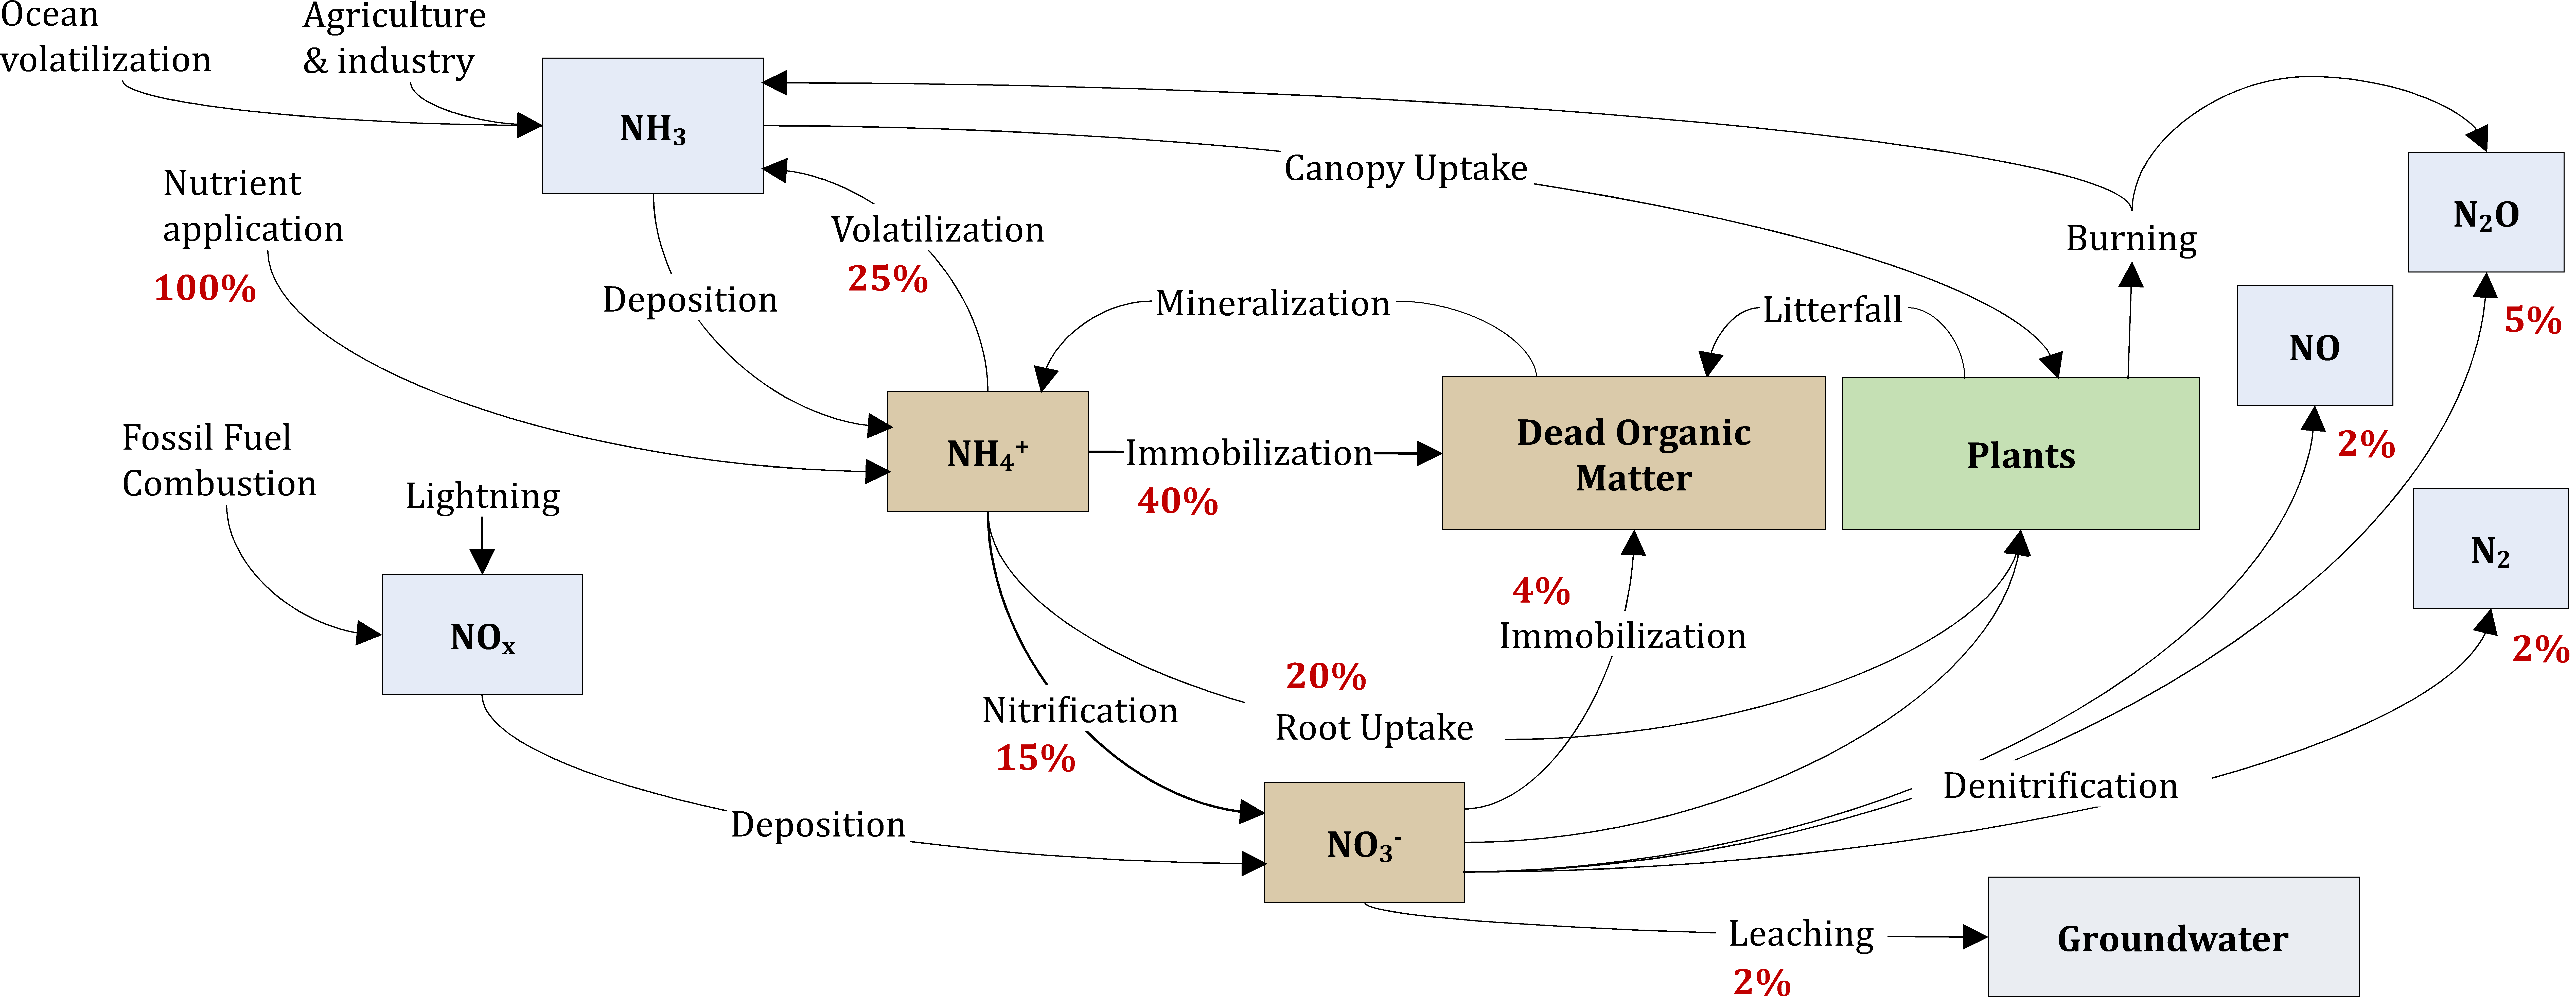

<b>Figure 2</b>. The fate of nitrogen after a single aerial application of urea to forest ecosystems in British Columbia, Canada (100% = 200 kg N ha-1). Fluxes with no reported number were assumed to have no effect on the current study, including emissions from burning, nitrogen gas (N2) and nitrogen oxide (NO).

In [15]:
display(Image(filename='images\FNM_NitrogenCycle.png',width=900))
meta=ufcs.FigureCaption(meta,'The fate of nitrogen after a single aerial application of urea to forest ecosystems in British Columbia, Canada (100% = 200 kg N ha-1). Fluxes with no reported number were assumed to have no effect on the current study, including emissions from burning, nitrogen gas (N2) and nitrogen oxide (NO).')

In [16]:
txt=ufcs.AddParagraphs(txt,4)

In [17]:
txt=ufcs.AddParagraphs(txt,2)

In [18]:
txt=ufcs.AddParagraphs(txt,3)

In [19]:
meta=ufcs.TableCaption(meta,'Relative responses of coastal Douglas-fir forest to a single application of urea under different model specifications and compared with a summary of observed responses in boreal and temperate forests. Model specification is labeled according to which fluxes are directly affected by nitrogen application (NGS: Net growth of tree stemwood; NGT: Net growth of total tree biomass; NGT+T: Net growth of total tree biomass plus tree biomass turnover; NGT+T+D: Net growth of total tree biomass + tree biomass turnover + and decomposition). Variables that are not represented by the model are shown as “n.a.”.')
df=pd.DataFrame(meta['Tables']['NutrientApp_ExperimentalResponseSummary'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('vertical-align','text-top'),('width','125px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','right'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('text-align','left'),('width','150px')]}]},overwrite=False)  
style.set_table_styles({'References':[{'selector':'','props': [('text-align','left'),('width','750px')]}]},overwrite=False)  

style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=0,subset=['Response (%)'])
display(style)

<b>Table 2</b>. Relative responses of coastal Douglas-fir forest to a single application of urea under different model specifications and compared with a summary of observed responses in boreal and temperate forests. Model specification is labeled according to which fluxes are directly affected by nitrogen application (NGS: Net growth of tree stemwood; NGT: Net growth of total tree biomass; NGT+T: Net growth of total tree biomass plus tree biomass turnover; NGT+T+D: Net growth of total tree biomass + tree biomass turnover + and decomposition). Variables that are not represented by the model are shown as “n.a.”.

Variable,Response (%),References
NPP,19,"LeBaur & Treseder (2008)a,h"
Foliage,24,Gower et al. (1992)c
Fine roots,"27, 56, 32","Yuan and Chen (2012), Yuan and Chen (2012)e, Yuan and Chen (2012)f"
"Litterfall, total","3, 2, 20, 12, 20","LeBaur & Treseder (2008), Janssens et al. (2010), Liu & Greaver (2010), Yue et al. (2016)g, Table 10"
Fine root turnover,"7, 21","Liu & Greaver (2010)g, Li et al. (2015)"
Stemwood turnover,37,This study (see mortality responses)
Litter decomposition,"-3, -6, 0","Knorr et al. (2005), Janssens et al. (2010), Yue et al. (2016)g"
Soil respiration,"-10, 6, 14, -2, 1","Janssens et al. (2010), Liu & Greaver (2010)g, Lu et al. (2011)d, Zhou et al. (2014), Yue et al. (2016)g"
Soil RH,"-15, -12, -20","Janssens et al. (2010), Liu & Greaver (2010)g, Zhou et al. (2014)"
Tree biomass,"35, 20",Janssens et al. (2010); Adams et al. (2005)


In [20]:
txt=ufcs.AddParagraphs(txt,7)

In [21]:
# Import experiments
dE=gu.ReadExcel(meta['Paths']['DB']['Nutrient Applications'] + '\\Forest Nutrient Addition Experiments DB.xlsx',sheet_name='Sheet1',skiprows=0)
elist=[]
elist.append({'Variable':'Exclusion Reason','Operator':'!=','Value':'nan'})
elist.append({'Variable':'Duration (years)','Operator':'<','Value':7.5})
elist.append({'Variable':'Duration (years)','Operator':'>','Value':12.5})
elist.append({'Variable':'Thinned','Operator':'==','Value':'Yes'})
elist.append({'Variable':'N Num Applications','Operator':'!=','Value':1})
elist.append({'Variable':'N Dose Per Application (kgN/ha)','Operator':'<','Value':150})
elist.append({'Variable':'N Dose Per Application (kgN/ha)','Operator':'>','Value':250})
elist.append({'Variable':'Stemwood Biomass Growth Net Units Combined','Operator':'!=','Value':'MgC/ha/yr'})
elist.append({'Variable':'Stemwood Biomass Growth Net Difference Relative Combined (%)','Operator':'<','Value':-100})
elist.append({'Variable':'Stemwood Biomass Growth Net Difference Relative Combined (%)','Operator':'>','Value':2000})
elist.append({'Variable':'Stemwood Biomass Growth Net Difference Relative Combined (%)','Operator':'isnan','Value':[]})
ikp,ExcActual,ExcActualUnique,ExcPercent,RemainA,RemainP=gu.IndexAndTrackExclusions(dE,elist)

dEI={}
for v in dE.keys():
    dEI[v]=dE[v][ikp]

vL=['Duration (years)','Stemwood Biomass Growth Net Difference Actual Combined','Stemwood Biomass Growth Net Difference Relative Combined (%)']
dES={}
for v in dEI.keys():
    try:
        dES[v]={}
        dES[v]['N']=ikp.size
        dES[v]['Mean']=np.nanmean(dEI[v])
        dES[v]['Median']=np.nanmedian(dEI[v])
        dES[v]['Weighted average']=np.nansum(dEI[v]*dEI['Num Sites'])/np.sum(dEI['Num Sites'])
        dES[v]['S.E.']=np.nanstd(dEI[v])/np.sqrt(ikp.size)
    except:
        pass

vL=['Reference','Experiment Name','Site Name','Num Sites','Species',
    'Stemwood Biomass Growth Net Difference Actual Combined','Stemwood Biomass Growth Net Difference Relative Combined (%)']
dEIS={} 
for v in vL:
    dEIS[v]=dEI[v]
    
meta=ufcs.TableCaption(meta,'Compilation of net stemwood growth response to single applications of nitrogen (N) over fixed-area plots. Volume was converted to biomass based on the wood density of each species (Zanne, 2009) and an average carbon concentration of 0.5 (Lamlom and Savidge, 2003). Biomass estimates do not include any correction for effects of N application on wood density.')
#ufcs.Table(meta['Tables']['NutrientApp_ExperimentalResponseStemwood'].copy())
df=pd.DataFrame(dEIS)
#df.iloc[np.where(df=='nan')]=np.nan
#df=df.fillna(" ")

style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('vertical-align','text-top'),('width','130px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','left'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])

style.set_properties(**{'text-align':'left'}).hide()

style.format(precision=0,subset=['Num Sites'])
style.format(precision=2,subset=['Stemwood Biomass Growth Net Difference Actual Combined'])
style.format(precision=1,subset=['Stemwood Biomass Growth Net Difference Relative Combined (%)'])

style.set_table_styles({'Reference':[{'selector':'','props':[('width','220px')]}]},overwrite=False)
style.set_table_styles({'Num Sites':[{'selector':'','props':[('width','50px')]}]},overwrite=False)
style.set_table_styles({'Species':[{'selector':'','props':[('width','220px'),('font-style','italic')]}]},overwrite=False)

display(style)

<b>Table 3</b>. Compilation of net stemwood growth response to single applications of nitrogen (N) over fixed-area plots. Volume was converted to biomass based on the wood density of each species (Zanne, 2009) and an average carbon concentration of 0.5 (Lamlom and Savidge, 2003). Biomass estimates do not include any correction for effects of N application on wood density.

Reference,Experiment Name,Site Name,Num Sites,Species,Stemwood Biomass Growth Net Difference Actual Combined,Stemwood Biomass Growth Net Difference Relative Combined (%)
Carlson et al 2014,Unknown,Tinity,1,Pinus taeda,0.00,0.0
Carlson et al 2014,Unknown,Effingham,1,Pinus taeda,-0.11,-2.1
Carlson et al 2014,Unknown,Wayne,1,Pinus taeda,0.12,2.6
Carlson et al 2014,Unknown,Montgomery,1,Pinus taeda,1.10,17.6
Carlson et al 2014,Unknown,Vance,1,Pinus taeda,0.61,19.5
Carlson et al 2014,Unknown,Whitfield,1,Pinus taeda,1.02,21.7
Carlson et al 2014,Unknown,Fairfield,1,Pinus taeda,1.37,27.7
Carlson et al 2014,Unknown,Choctaw,1,Pinus taeda,0.71,32.9
Carlson et al 2014,Unknown,Union,1,Pinus taeda,2.12,34.2
Carlson et al 2014,Unknown,Appling,1,Pinus taeda,0.80,32.9


In [22]:
txt=ufcs.AddParagraphs(txt,2)

In [23]:
txt=ufcs.AddParagraphs(txt,4)

In [24]:
meta=ufcs.TableCaption(meta,'Relative periodic responses of foliage and stemwood biomass to N application.')
df=pd.DataFrame(meta['Tables']['NutrientApp_ExperimentalResponseFoliage'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('vertical-align','text-top'),('width','165px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','right'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Species':[{'selector':'','props': [('font-style','italic'),('text-align','left'),('width','220px')]}]},overwrite=False)  
style.set_table_styles({'Reference':[{'selector':'','props': [('text-align','left'),('width','225px')]}]},overwrite=False)  
style.set_table_styles({11:[{'selector':'td','props':[('font-style','normal'),('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
style.format(precision=0,subset=['Foliage response (%)','Stemwood response (%)'])
style.format(precision=2,subset=['rF:SW'])
display(style)

<b>Table 4</b>. Relative periodic responses of foliage and stemwood biomass to N application.

Species,Foliage response (%),Stemwood response (%),rF:SW,Reference
Pinus sylvestris,136,146,0.90,Axelsson and Axelsson (1986)
Pinus radiata,61,67,0.90,Beets and Madgwick (1987)
Pseudotsuga menziesii var. menziesii,174,65,2.70,Brix (1983)
Pseudotsuga menziesii var. menziesii,15400,87,2217.00,Mitchell et al. (1996)
Populus deltoides,16,70,0.20,Coleman et al. (2004)
Populus deltoides,13,72,0.20,Coleman et al. (2004)
Populus deltoides,-4,56,-0.10,Coleman et al. (2004)
Picea abies,1,5,0.20,Gundale et al. (2014)
Picea abies,3,6,0.60,Gundale et al. (2014)
Pinus taeda,75,87,0.90,King et al. (1999)


In [25]:
meta=ufcs.TableCaption(meta,'Relative periodic responses of branch and stemwood biomass to N application.')
df=pd.DataFrame(meta['Tables']['NutrientApp_ExperimentalResponseBranch'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('vertical-align','text-top'),('width','175px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','right'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Species':[{'selector':'','props': [('font-style','italic'),('text-align','left'),('width','220px')]}]},overwrite=False)  
style.set_table_styles({'Reference':[{'selector':'','props': [('text-align','left'),('width','250px')]}]},overwrite=False)  
style.set_table_styles({12:[{'selector':'td','props':[('font-style','normal'),('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
style.format(precision=0,subset=['Branch response (%)','Stemwood response (%)'])
style.format(precision=2,subset=['rBR:SW'])
display(style)

<b>Table 5</b>. Relative periodic responses of branch and stemwood biomass to N application.

Species,Branch response (%),Stemwood response (%),rBR:SW,Reference
Pinus sylvestris,200,146,1.40,Axelsson and Axelsson (1986)
Pinus radiata,132,67,2.00,Beets and Madgwick (1987)
Pseudotsuga menziesii var. menziesii,372,65,5.70,Brix (1983)
Pseudotsuga menziesii var. menziesii,33,87,4.70,Mitchell et al. (1996)
Populus deltoides,64,70,0.90,Coleman et al. (2004)
Populus deltoides,79,72,1.10,Coleman et al. (2004)
Populus deltoides,71,56,1.30,Coleman et al. (2004)
Pseudotsuga menziesii var. glauca,367,70,5.30,Gower (1992)
Picea abies,2,5,0.50,Gundale et al. (2014)
Picea abies,5,6,0.70,Gundale et al. (2014)


In [26]:
meta=ufcs.TableCaption(meta,'Relative periodic responses of coarse root and stemwood biomass to N application.')
df=pd.DataFrame(meta['Tables']['NutrientApp_ExperimentalResponseRootCoarse'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('vertical-align','text-top'),('width','175px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','right'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Species':[{'selector':'','props': [('font-style','italic'),('text-align','left'),('width','220px')]}]},overwrite=False)  
style.set_table_styles({'Reference':[{'selector':'','props': [('text-align','left'),('width','250px')]}]},overwrite=False)  
style.set_table_styles({4:[{'selector':'td','props':[('font-style','normal'),('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
style.format(precision=0,subset=['Coarse root response (%)','Stemwood response (%)'])
style.format(precision=2,subset=['rRC:SW'])
display(style)

<b>Table 6</b>. Relative periodic responses of coarse root and stemwood biomass to N application.

Species,Coarse root response (%),Stemwood response (%),rRC:SW,Reference
Pinus taeda,102,165,1.60,Albaugh et al. (1998)
Pinus taeda,87,179,2.10,King et al (1999)
Pinus sylvestris,146,199,1.40,Axelsson and Axelsson (1986)
Populus deltoides,56,31,0.60,Coleman et al (2004)
Median,,,1.50,


In [27]:
meta=ufcs.TableCaption(meta,'Relative periodic responses of fine root and stemwood biomass to N application.')
df=pd.DataFrame(meta['Tables']['NutrientApp_ExperimentalResponseRootFine'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('vertical-align','text-top'),('width','175px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','right'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Species':[{'selector':'','props': [('font-style','italic'),('text-align','left'),('width','220px')]}]},overwrite=False)  
style.set_table_styles({'Reference':[{'selector':'','props': [('text-align','left'),('width','250px')]}]},overwrite=False)  
style.set_table_styles({5:[{'selector':'td','props':[('font-style','normal'),('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
style.format(precision=0,subset=['Fine root response (%)','Stemwood response (%)'])
style.format(precision=2,subset=['Ratio, rRF:SW'])
display(style)

<b>Table 7</b>. Relative periodic responses of fine root and stemwood biomass to N application.

Species,Fine root response (%),Stemwood response (%),"Ratio, rRF:SW",Reference
Deciduous spp.,43,3,13,Frey et al. (2014)
Pinus taeda,-500,102,-4.9,Albaugh et al. (1998)
Pinus sylvestris,5,146,0,Axelsson and Axelsson (1986)
Populus deltoides,54,56,1,Coleman et al. (2004)
Pinus resinosa,-93,-73,n.a.,Frey et al. (2014)
Median,,,0.5,


In [28]:
txt=ufcs.AddParagraphs(txt,2)

In [29]:
meta=ufcs.TableCaption(meta,'Responses of stemwood mortality to nitrogen application.')
df=pd.DataFrame(meta['Tables']['NutrientApp_ExperimentalResponseStemwoodMortality'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('vertical-align','text-top'),('width','175px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','right'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
]).hide()
style.set_table_styles({'Species':[{'selector':'','props': [('font-style','italic'),('text-align','left'),('width','220px')]}]},overwrite=False)  
style.set_table_styles({'Reference':[{'selector':'','props': [('text-align','left'),('width','250px')]}]},overwrite=False)  
style.set_table_styles({10:[{'selector':'td','props':[('font-style','normal'),('font-weight','bold')]}]},axis=1,overwrite=False)  
style.format(precision=0,subset=['Response (%)'])
style.format(precision=2,subset=['Response (Mg C ha-1 yr-1)'])
display(style)

<b>Table 8</b>. Responses of stemwood mortality to nitrogen application.

Species,Response (Mg C ha-1 yr-1),Response (%),Reference
Deciduous spp.,0.30,35,Pregitzer et al. (2008)
Deciduous spp.,0.15,23,Frey et al. (2014)
Deciduous spp.,0.57,85,Frey et al. (2014)
Pinus resinosa,0.10,10,Frey et al. (2014)
Pinus resinosa,2.78,277,Frey et al. (2014)
Pseudotsuga menziesii var. menziesii,0.13,28,Unpublished data
Pseudotsuga menziesii var. menziesii,0.42,38,Canary et al. (2000)
Thuja plicata,0.18,636,Jang and Eskelson (2020)
Tsuga heterophylla,0.10,9,Unpublished data
Tsuga heterophylla,0.95,424,Jang and Eskelson (2020)


In [30]:
txt=ufcs.AddParagraphs(txt,3)

In [31]:
meta=ufcs.TableCaption(meta,'Relative responses of litterfall to nitrogen application. Notes by superscript: 1:urea treatment only.')
df=pd.DataFrame(meta['Tables']['NutrientApp_ExperimentalResponseLitterfall'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('vertical-align','text-top'),('width','175px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='td',props=[('text-align','right'),('vertical-align','text-top')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Species':[{'selector':'','props': [('font-style','italic'),('text-align','left'),('width','220px')]}]},overwrite=False)  
style.set_table_styles({'Included tissues':[{'selector':'','props': [('text-align','left')]}]},overwrite=False)  
style.set_table_styles({'Reference':[{'selector':'','props': [('text-align','left'),('width','250px')]}]},overwrite=False)  
style.set_table_styles({15:[{'selector':'td','props':[('font-style','normal'),('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=0,subset=['Response (%)'])
display(style)

<b>Table 9</b>. Relative responses of litterfall to nitrogen application. Notes by superscript: 1:urea treatment only.

Species,Response (%),Included tissues,Reference
Acer mono,35,Foliage,Li et al. (2010)
Betulla platyphylla,4,Foliage,Li et al. (2010)
Deciduous spp.,3,Foliage,Pregitzer et al. (2008)
Deciduous spp.,9,Aboveground,Magill et al. (2004)
Fraxinus mandschuria,30,Foliage,Li et al. (2010)
Nothofagus solandri,32,Foliage,Davis et al. (2004)
Nothofagus solandri,59,Foliage,Davis et al. (2004)
Pinus koraiensis,20,Foliage,Li et al. (2010)
Pinus resinosa,20,Aboveground,Magill et al. (2004)
Pinus resinosa,26,Foliage,Haynes and Gower (1995)


In [32]:
txt=ufcs.AddParagraphs(txt,1)

In [33]:
txt=ufcs.AddParagraphs(txt,8)

In [34]:
txt=ufcs.AddParagraphs(txt,9)

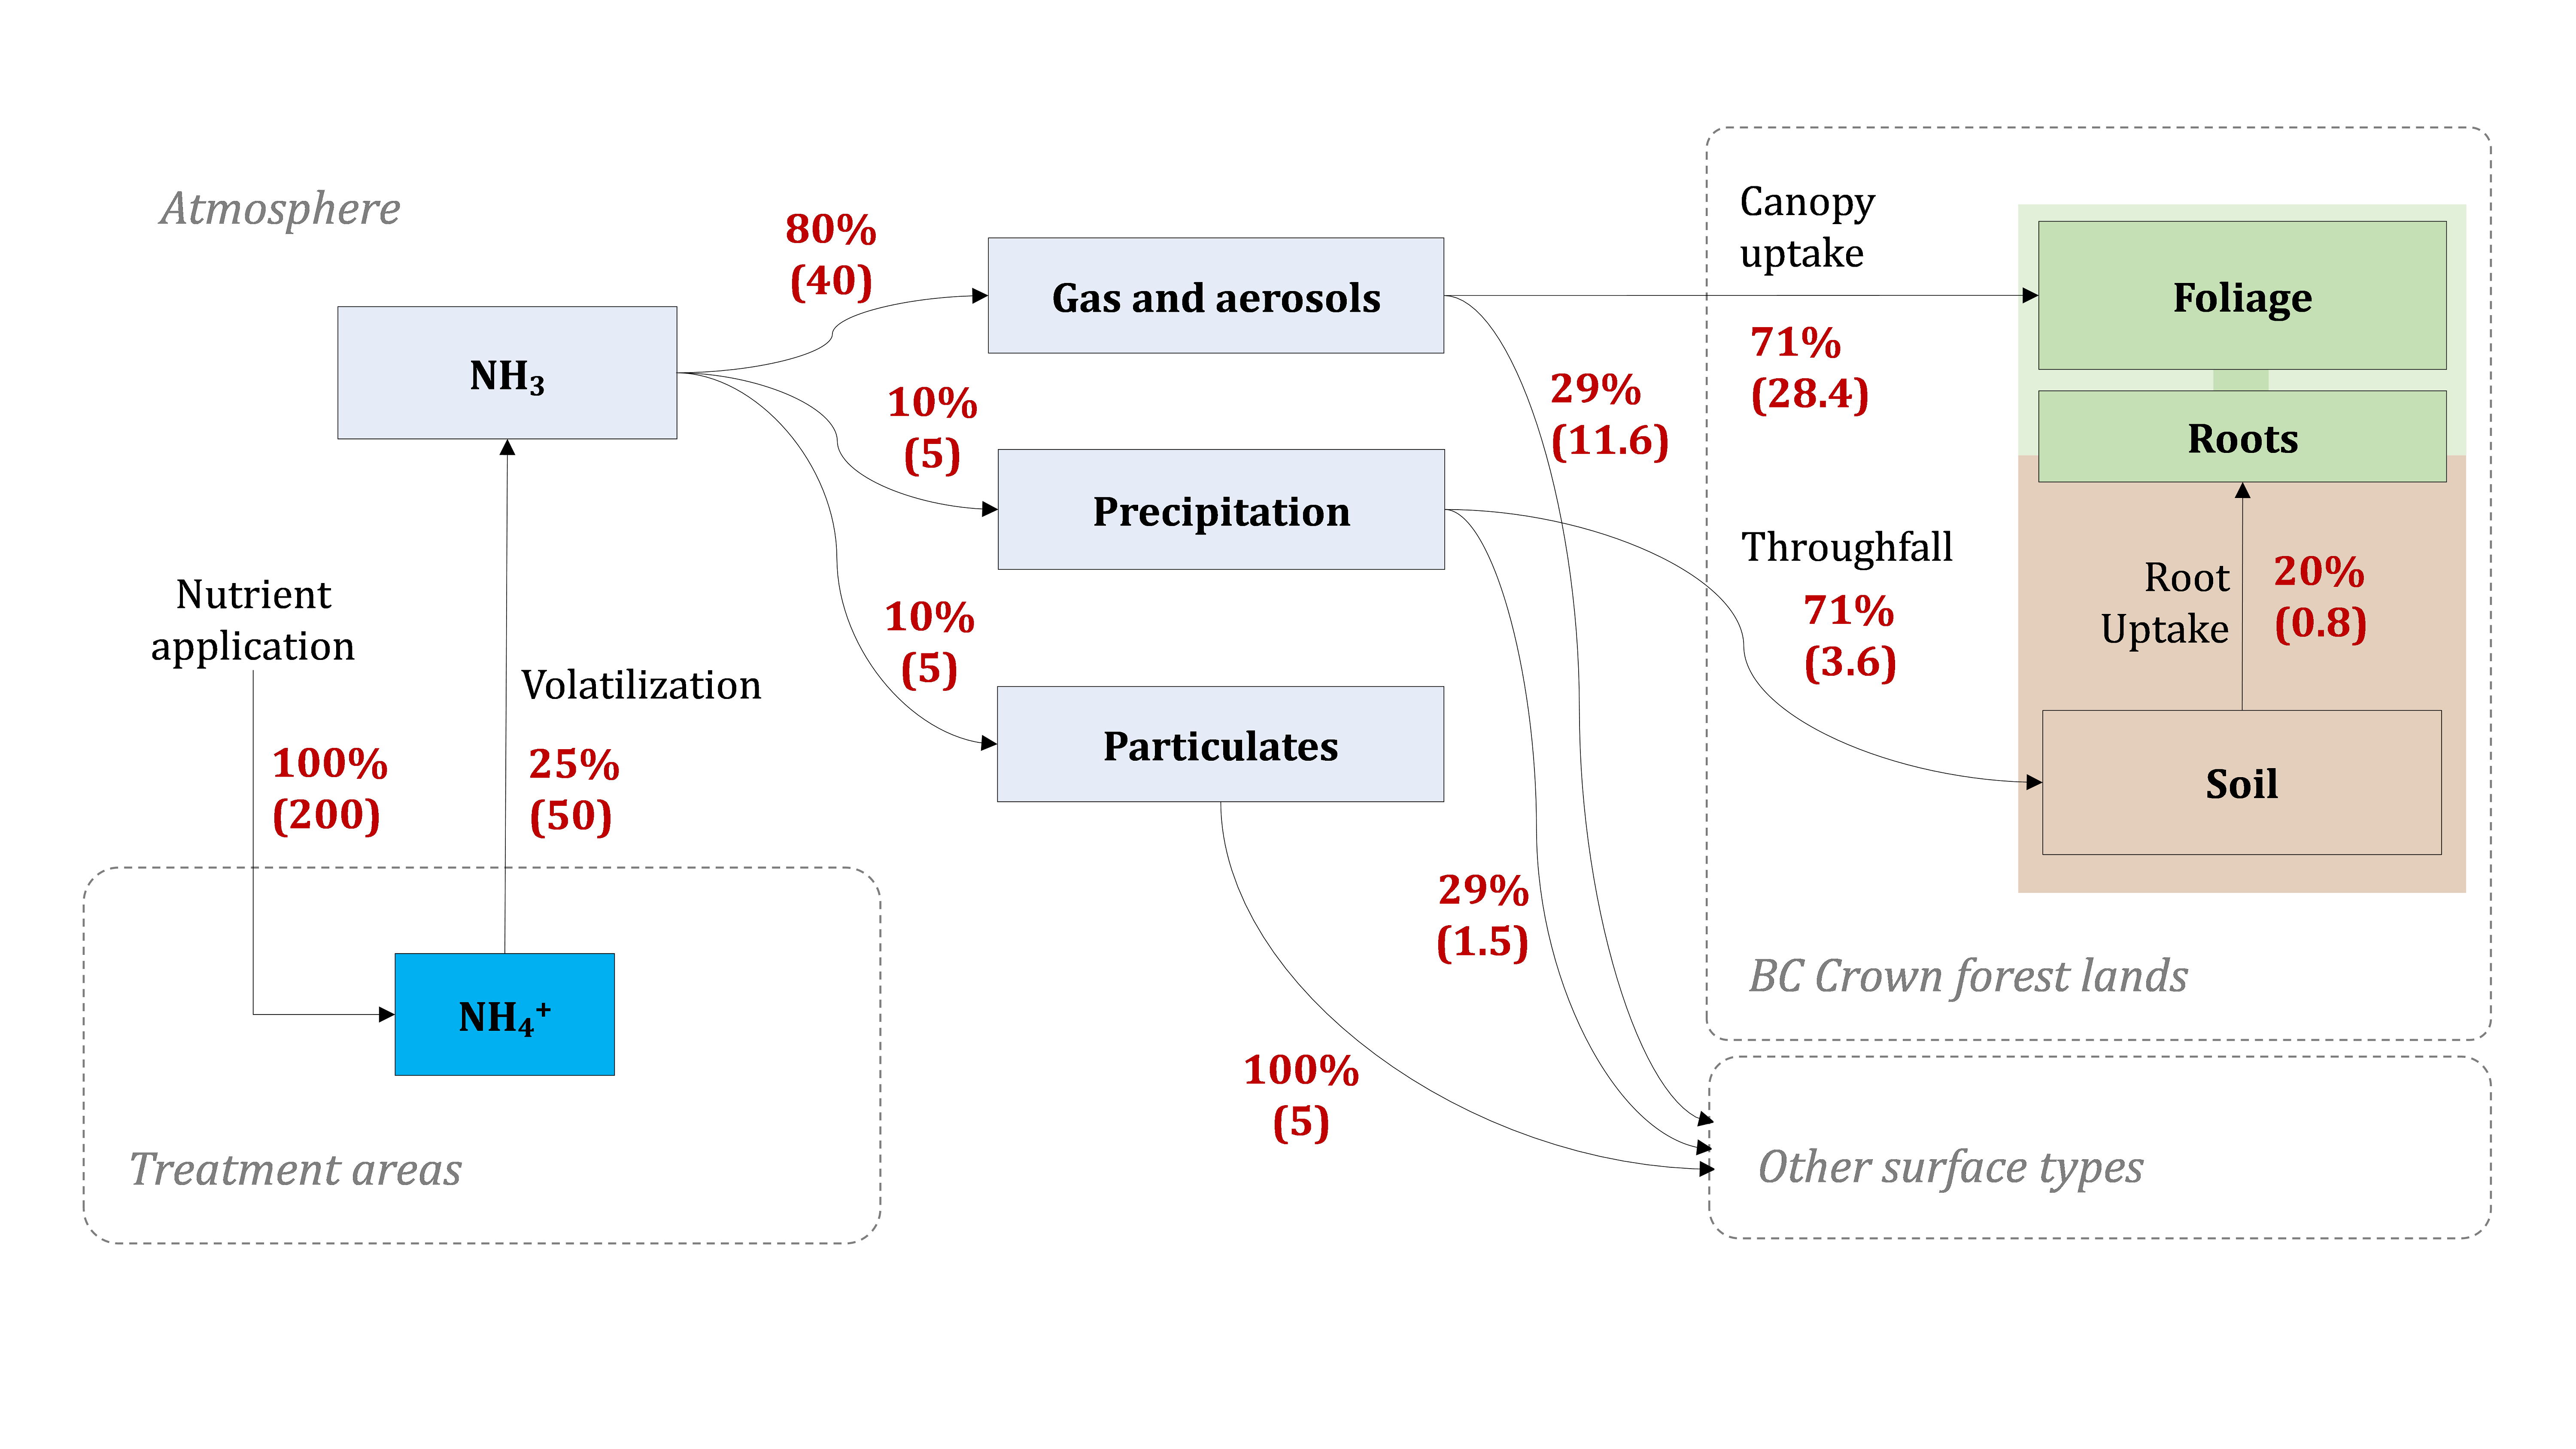

<b>Figure 3</b>. The fate of volatilized nitrogen following 200 kg N ha-1 application of urea. Numbers in parentheses indicate nitrogen fluxes (kg N ha-1).

In [35]:
display(Image(filename='images\FNM_DepositionTreatmentAreas.png',width=1000))
meta=ufcs.FigureCaption(meta,'The fate of volatilized nitrogen following 200 kg N ha-1 application of urea. Numbers in parentheses indicate nitrogen fluxes (kg N ha-1).')

In [36]:
txt=ufcs.AddParagraphs(txt,2)

In [37]:
txt=ufcs.AddParagraphs(txt,2)

In [38]:
meta=ufcs.TableCaption(meta,'Comparing different model specifications of the response of net ecosystem productivity to N application.')
df=pd.DataFrame(meta['Tables']['NutrientApp_SingleStandRunDescriptions'].copy())
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('vertical-align','text-top'),('width','600px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Specification':[{'selector':'','props': [('text-align','left'),('width','90px')]}]},overwrite=False)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

<b>Table 10</b>. Comparing different model specifications of the response of net ecosystem productivity to N application.

Specification,Description
NGS,"Response of NEE is inferred from the change in stemwood carbon (i.e., net stemwood growth). Responses in net stemwood growth are constrained to match those from experiments."
NGT,"Response of NEE is inferred from the change in carbon of whole trees, including bark, branches, foliage, mechantable stemwood, non-merchantable stemwood, fine roots and coarse roots. Responses in net growth of each biomass pool are constrained to match those from experiments."
NGT+T,"Response of NEE is inferred from the change in carbon of whole trees and additional direct effects of N application on turnover of bark, branches, foliage, fine roots, coarse roots, and stemwood. Responses in biomass turnover are constrained to match those from experiments."
NGT+T+D,"Response of NEE is inferred from the change in carbon of whole trees, plus direct effects of N application on biomass turnover, plus direct effects of N application on rates of decomposition."


In [39]:
txt=ufcs.AddParagraphs(txt,8)

In [40]:
txt=ufcs.AddParagraphs(txt,12)

In [41]:
txt=ufcs.AddParagraphs(txt,2)

In [42]:
# Import FNM demonstration project
pNamD,metaD,mosD,tvD=unm.ImportDemo()

In [43]:
txt=ufcs.AddParagraphs(txt,2)

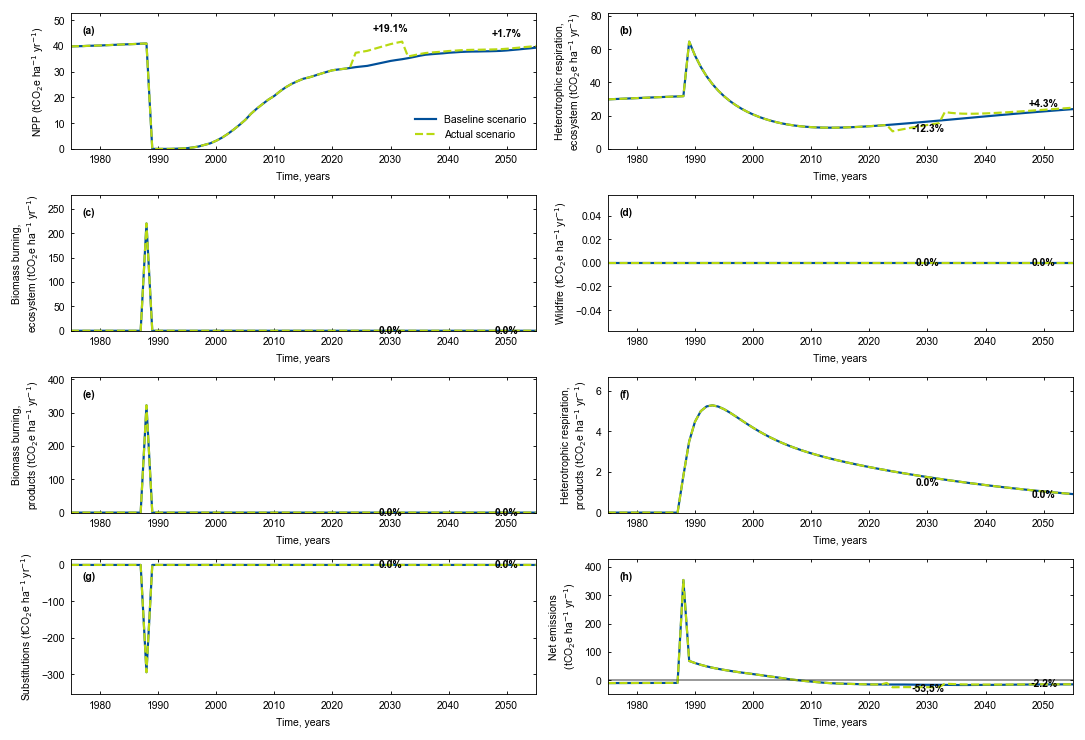

<b>Figure 4</b>. Carbon fluxes for the baseline sceanrio (wihout N application) and actual scenario (with N application).

In [44]:
td={'Year':np.array([2030,2050]),'Units':'Relative'}
udem.PlotFluxes(metaD,mosD,pNamD,
                FigSize=[22,15],
                cNam='Coast No Harvest',
                OperSpace='Mean',
                t0=1975,
                t1=2055,
                TextDelta=td,
                ScenarioLabels=['Baseline scenario','Actual scenario'],
                LegendLoc='lower right'); plt.show()
meta=ufcs.FigureCaption(meta,'Carbon fluxes for the baseline sceanrio (wihout N application) and actual scenario (with N application).')

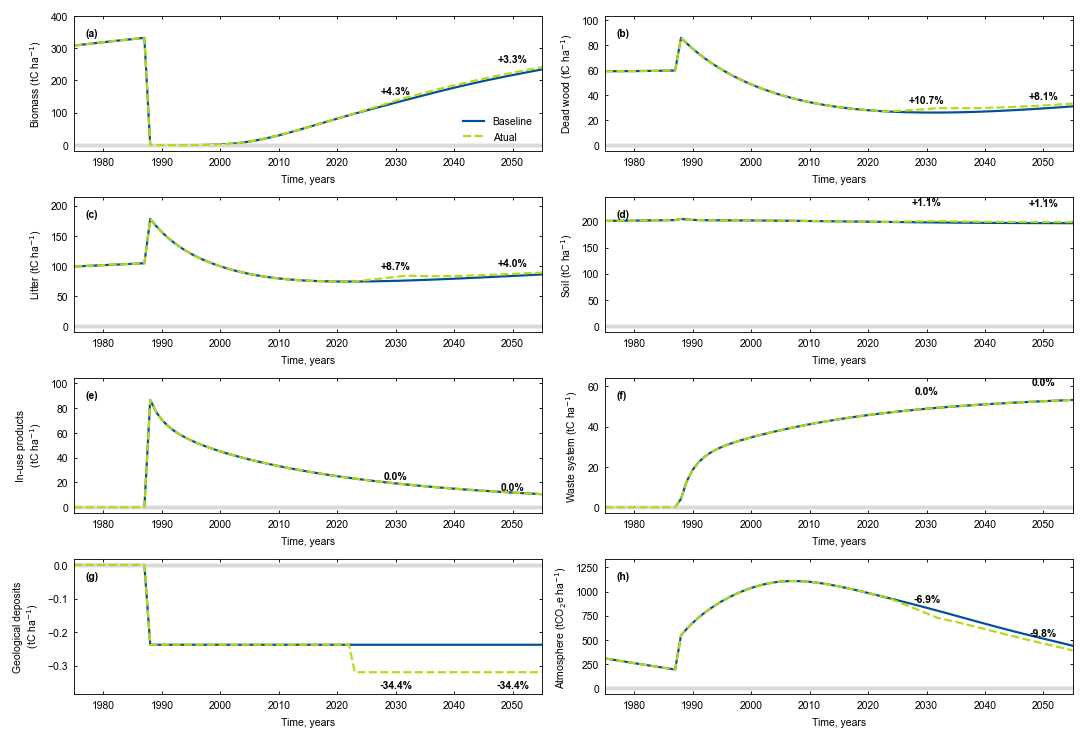

<b>Figure 5</b>. Carbon pools for the baseline sceanrio (wihout N application) and actual scenario (with N application).

In [45]:
td={'Year':np.array([2030,2050]),'Units':'Relative'}
udem.PlotPools(metaD,mosD,pNamD,
               FigSize=[22,15],
               cNam='Coast No Harvest',
               OperSpace='Mean',
               t0=1975,
               t1=2055,
               TextDelta=td,
               ScenarioLabels=['Baseline','Atual'],
               LegendLoc='lower right'); plt.show()
meta=ufcs.FigureCaption(meta,'Carbon pools for the baseline sceanrio (wihout N application) and actual scenario (with N application).')

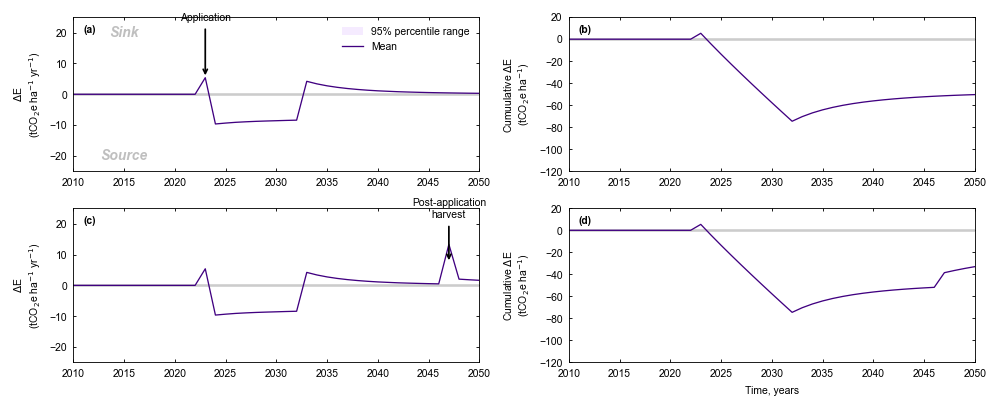

<b>Figure 6</b>. Effects of aerial nutrient application on greenhouse gases emissions (ΔE) in coastal forests of British Columbia, Canada: (a-b) undisturbed stands (c-d) stands that were harvested upon reaching merchantability. Shading indicates the 50 and 95% confidence intervals, respectively.

In [46]:
unm.CumulativelativeGHGBenefit_WithCI(metaD,pNamD,mosD,
                                      t0=2010,
                                      t1=2050,
                                      Error='50%',
                                      LegendPosition='upper right'); plt.show()
meta=ufcs.FigureCaption(meta,'Effects of aerial nutrient application on greenhouse gases emissions (ΔE) in coastal forests of British Columbia, Canada: (a-b) undisturbed stands (c-d) stands that were harvested upon reaching merchantability. Shading indicates the 50 and 95% confidence intervals, respectively.')

In [47]:
vL=['E_NPP_ForestSector_Total',
    'E_RHE_ForestSector_Total',
    'E_Denit_ForestSector_Total',
    'E_Volat_ForestSector_Total',    
    'E_Wildfire_ForestSector_Total',
    'E_BBE_ForestSector_Total',    
    'E_BBP_ForestSector_Total',
    'E_RHP_ForestSector_Total',
    'E_ForestryOps_EnergySC_Total',
    'E_ForestryOps_EnergyT_Total',
    'E_ForestryOps_IPPU_Total',
    'E_Substitution_EnergySC_Total',
    'E_Substitution_EnergyT_Total',
    'E_Substitution_IPPU_Total',
    'E_NSB',
    'E_NAB']

In [48]:
meta=ufcs.TableCaption(meta,'Effect of nutrient application on GHG emissions summed over the first 50 years after application (tCO2e/ha). Negative values indicate removals, positive values indicate emissions.')
df=udem.ExportTableScenariosAndDelta(metaD,pNamD,mosD,
                                     cNam=['Coast No Harvest'],
                                     NameTable='Pools',
                                     OperTime='Sum',
                                     OperSpace='Mean',
                                     t0=metaD[pNamD]['Project']['Year Project'],
                                     t1=2050,
                                     iPS=0,iSS=0,iYS=0,iOS=0,
                                     Units='Actual',
                                     Multiplier=1,
                                     Decimals=1,
                                     Save='Off',
                                     Variables=vL)
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=1)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

<b>Table 11</b>. Effect of nutrient application on GHG emissions summed over the first 50 years after application (tCO2e/ha). Negative values indicate removals, positive values indicate emissions.

Variable,Baseline,Action,Delta
E_NPP_ForestSector_Total,-1002.3,-1070.1,-67.8
E_RHE_ForestSector_Total,517.2,529.3,12.1
E_Denit_ForestSector_Total,0.0,4.8,4.8
E_Volat_ForestSector_Total,0.0,0.3,0.3
E_Wildfire_ForestSector_Total,0.0,0.0,0.0
E_BBE_ForestSector_Total,0.0,0.0,0.0
E_BBP_ForestSector_Total,0.0,0.0,0.0
E_RHP_ForestSector_Total,42.3,42.3,0.0
E_ForestryOps_EnergySC_Total,0.0,0.6,0.6
E_ForestryOps_EnergyT_Total,0.0,0.0,0.0


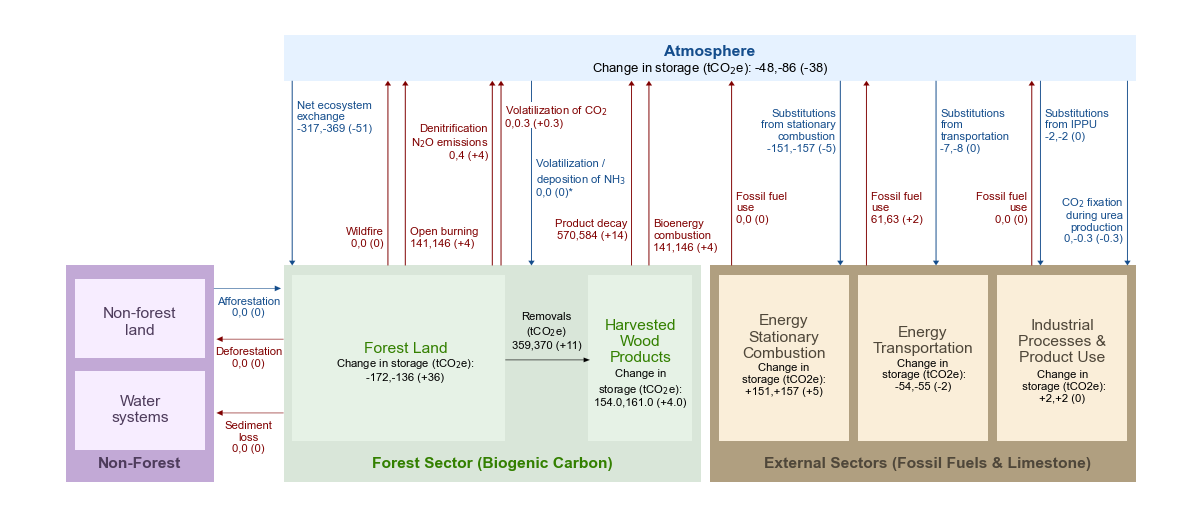

<b>Figure 9</b>. Effects of nutrient application on GHG fluxes 50 years after application. For each flux or pool, the first and second numbers indicate values for the baseline (no application) and actual (with application) scenarios. The numbers in parenthases are the differences. Fluxes are expressed as tonnes of carbon dioxide equivalent (tCO2e) summed over the 50 year period, while pools are expressed in units of tonnes carbon (tC)

In [61]:
# Plot schematic summary of GHG emissions
udem.PlotSchematicBalance(metaD,pNamD,mosD,
                             cNam='Coast With Harvest',
                             t0=metaD[pNamD]['Project']['Year Project'],
                             t1=2050); plt.show()
meta=ufcs.FigureCaption(meta,'Effects of nutrient application on GHG fluxes 50 years after application. For each flux or pool, the first and second numbers indicate values for the baseline (no application) and actual (with application) scenarios. The numbers in parenthases are the differences. Fluxes are expressed as tonnes of carbon dioxide equivalent (tCO2e) summed over the 50 year period, while pools are expressed in units of tonnes carbon (tC)')

In [50]:
txt=ufcs.AddParagraphs(txt,5)

In [51]:
txt=ufcs.AddParagraphs(txt,3)

In [52]:
txt=ufcs.AddParagraphs(txt,2)

In [53]:
flg=0
if flg==1:
    pNamD2='Demo_NM_CompSpecs'
    metaD2=gu.ipickle(r'C:\Data\BCFCS\Demo_NM_CompSpecs\Inputs\Metadata.pkl')
    tv=np.arange(metaD2[pNamD2]['Project']['Year Start Saving'],metaD2[pNamD2]['Project']['Year End']+1,1)
    mosD2=cbu.Import_MOS_ByScnAndStrata_GHGEcon(metaD2,pNamD2)
    mosD2[pNamD2]['Delta']={}
    mosD2[pNamD2]['Delta']['NGS']={'iB':0,'iP':1}
    mosD2[pNamD2]['Delta']['NGT']={'iB':0,'iP':2}
    mosD2[pNamD2]['Delta']['NGT+T']={'iB':0,'iP':3}
    mosD2[pNamD2]['Delta']['NGT+T+D']={'iB':0,'iP':4}
    mosD2=cbu.Import_MOS_ByScnComparisonAndStrata(metaD2,pNamD2,mosD2)
    iT=np.where( (tv>=1800) & (tv<=2150) )[0] 
    udem.NA_CompareSpecifications_ChangeInPools(metaD2,pNamD2,mosD2); plt.show()
    meta=ufcs.FigureCaption(meta,'Change in carbon storage following aerial application of urea (in 2020) to a 1-hectare coastal forest for model simulations with specification of: (a) net growth of stemwood (NGS), (b) net growth of all tree biomass pools (NGT), (c) NGT plus turnover (NGT+T) and (d) NGT+T plus decomposition (NGT+T+D).')

In [54]:
txt=ufcs.AddParagraphs(txt,1)

In [55]:
txt=ufcs.AddParagraphs(txt,1)

In [56]:
txt=ufcs.AddParagraphs(txt,1)

In [57]:
txt=ufcs.AddParagraphs(txt,2)

In [58]:
# Calculate total area treated and number of treatments
# Treatment area differs from number of treatments due to repeat applications on the same area
z=gis.OpenGeoTiff(meta['Paths']['bc1ha'] + '\\RSLT_ACTIVITY_TREATMENT_SVW\\FE-CA_Count.tif')['Data']
print(np.where(z>0)[0].size)
print(np.where(z>1)[0].size)

466552
79440


In [59]:
# Import modelling for completed operations
pNamNM,metaNM,tv,mosNM,mosNM_WF,dmecNM=unm.ImportModelResults()

KeyboardInterrupt: 

In [ ]:
if meta['Graphics']['Show Maps']=='On':    
    meta['Graphics']['Map']['Fig Width']=12.5
    meta['Graphics']['Map']['Show Cities']='On'
    meta['Graphics']['Map']['Show Symbol Labels']='On'
    p1ha.Plot_FNM_TimeSpan(meta,roi,1971,metaNM[pNamNM]['YearCurrent']);plt.show()
    #ufcs.PlotMapOfSparseXYSample(metaNM,pNamNM);plt.show() # This just shows where the model is sampling from
    meta=ufcs.FigureCaption(meta,'Map of aerial nutrient application treatment areas on public land.')

In [ ]:
txt=ufcs.AddParagraphs(txt,2)

In [ ]:
meta=ufcs.TableCaption(meta,'Effects of nutrient application on carbon pools 10 years after application (tC/ha). Positive values indicate an increase attributed to nutrient application.')
vL=['C_Biomass','C_DeadWood','C_Litter','C_Soil','C_Forest']
df=udem.ExportTableDelta(metaD,pNamD,mosD,
                         NameTable='ScnComp1',
                         OperSpace='Mean',
                         OperTime='Mean',
                         t0=metaD[pNamD]['Project']['Year Project'],
                         t1=metaD[pNamD]['Project']['Year Project']+10,
                         Units='Actual',
                         Variables=vL,
                         Save='Off')
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=2)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
meta=ufcs.TableCaption(meta,'Effect of nutrient application on GHG fluxes summed over the first 50 years after application (tCO2e/ha). Negative values indicate removals, positive values indicate emissions.')
vL=['E_Domestic_ForestSector_NEE','E_Domestic_ForestSector_OpenBurning','E_Domestic_ForestSector_Wildfire',
    'E_Domestic_ForestSector_Denit','E_Domestic_ForestSector_Volat','E_Domestic_ForestSector_HWP','E_Domestic_Bioenergy',
    'E_Domestic_ForestOperations','E_Substitution_Energy','E_Substitution_Material','E_LULUCF','E_Atmosphere_SubstitutionExcluded',
    'E_Atmosphere_SubstitutionIncludedHalf','E_NetBiosphereExchange']
df=udem.ExportTableDelta(metaD,pNamD,mosD,
                              NameTable='ScnComp1',
                              OperSpace='Mean',
                              OperTime='Mean',
                              t0=metaD[pNamD]['Project']['Year Project'],
                              t1=metaD[pNamD]['Project']['Year Project']+50,
                              Units='Actual',
                              Variables=vL,
                              Save='Off')
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=2)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
meta=ufcs.TableCaption(meta,'Mean nitrogen-use efficiency (NUE) over the first ten years post application (kgC/kgN). Values were calculated based on the kg of N applied.')
tPeriod=[2020,2030]
df=unm.NA_CalcNUE(metaD,pNamD,mosD,
                   NameTable='ScnComp1',
                   t0=metaD[pNamD]['Project']['Year Project'],
                   t1=metaD[pNamD]['Project']['Year Project']+10,
                   cNam=['Coast No Harvest','Interior No Harvest'])
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','230px')]}]},overwrite=False)  
style.format(precision=2)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

In [ ]:
txt=ufcs.AddParagraphs(txt,2)

In [ ]:
meta=ufcs.TableCaption(meta,'Effects of nutrient application on removal yields following clearcut harvest (m3/ha). Positive values indicate a gain in yield due to nutrient application.')
vL=['V_ToMill_MerchGreen','V_ToMill_MerchDead','V_ToMill_MerchTotal']
tL=[2020,2080]
df=udem.ExportTableDelta(metaD,pNamD,mosD,
                              NameTable='ScnComp1',
                              cNam=['Coast With Harvest','Interior With Harvest'],
                              OperSpace='Mean',
                              OperTime='Sum',
                              t0=2020,
                              t1=2080,
                              Units='All',
                              Variables=vL,                              
                              Save='Off')
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color','#dee9fa'),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=1)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
meta=ufcs.TableCaption(meta,'Effects of nutrient application on economics and abatement cost.')
vL=['Cost Nutrient Management','Cost Total','Revenue Gross','Revenue Net']
df=udem.ExportTableDelta(metaD,pNamD,mosD,
                         table_name='ScnComp1',
                         operSpace='Mean',
                         operTime='Sum',
                         t0=metaD[pNamD]['Project']['Year Project'],
                         t1=metaD[pNamD]['Project']['Year Project']+100,
                         Units='Actual',
                         Variables=vL,
                         Save='Off')
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','180px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=2)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

In [ ]:
udem.PlotCashflow(metaD,pNamD,mosD,
                  cNam='Coast With Harvest',
                  t0=1950,t1=2100); plt.show()
meta=ufcs.FigureCaption(meta,'Cashflow implications from nutrient application prior to harvesting.')

In [ ]:
txt=ufcs.AddParagraphs(txt,3)

In [ ]:
cNam='Low Harvest'
unm.Plot_EmissionsAnnAndCumu_TimeSeriesCurrentYear(metaNM,mosNM,pNamNM,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of 2023 operations on annual and cumulative GHG emissions.')

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
meta=ufcs.TableCaption(meta,'Annual fluxes averaged over 2023-2030 (MtCO2e/yr) for completed aerial nutrient applications. Net primary producitivity (NPP) is expressed as a negative (i.e., -1 x NPP).')
vL=['E_Domestic_ForestSector_NEE','E_Domestic_ForestSector_OpenBurning','E_Domestic_ForestSector_Wildfire',
    'E_Domestic_ForestSector_Denit','E_Domestic_ForestSector_Volat','E_Domestic_ForestSector_HWP','E_Domestic_Bioenergy',
    'E_Domestic_ForestOperations','E_Substitution_Energy','E_Substitution_Material','E_LULUCF','E_Atmosphere_SubstitutionExcluded',
    'E_Atmosphere_SubstitutionIncludedHalf','E_NetBiosphereExchange','E_FossilFuels']
iYS=np.where(metaNM[pNamNM]['Project']['Strata']['Year']['Unique CD']==str(metaNM[pNamNM]['YearCurrent']))[0][0]
df=udem.ExportTableScenariosAndDelta(metaNM,pNamNM,mosNM,
                                     cNam=cNam,
                                     table_name='Pools',
                                     operTime='Sum',
                                     operSpace='Sum',
                                     t0=2023,t1=2050,
                                     iPS=0,iSS=0,iYS=iYS,
                                     Units='Actual',
                                     Multiplier=1e-6,
                                     Save='Off',
                                     Variables=vL)
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=2)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

In [ ]:
txt=ufcs.AddParagraphs(txt,2)

In [ ]:
unm.Plot_EmissionsAnnAndCumu_TimeSeriesCompleted(metaNM,mosNM,pNamNM,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of completed operations on annual and cumulative GHG emissions.')

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
meta=ufcs.TableCaption(meta,'Standing volume (Mm3) and volume yields (Mm3/yr) for completed operations, averaged over 2023-2050 for aerial nutrient application.')
vL=['E_LULUCF','E_Atmosphere_SubstitutionExcluded',
    'E_Atmosphere_SubstitutionIncludedHalf','E_NetBiosphereExchange','E_FossilFuels',
    'V_ToMill_MerchTotal','V_ToMill_NonMerchTotal',
   'Cost Total','Cost Silviculture Total','Revenue Gross','Revenue Net']
df=udem.ExportTableScenariosAndDelta(metaNM,pNamNM,mosNM,
                                     cNam=cNam,
                                     table_name='Pools',
                                     operTime='Sum',
                                     operSpace='Sum',
                                     t0=1961,t1=2030,
                                     iPS=0,iSS=0,iYS=0,
                                     Units='Actual',
                                     Multiplier=1e-6,
                                     Save='Off',
                                     Variables=vL)
df=df.reset_index()
df=df.rename(columns={'index':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color'meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
])
style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=1)
style.set_properties(**{'text-align':'left'}).hide()
display(style)

In [ ]:
txt=ufcs.AddParagraphs(txt,2)

In [ ]:
unm.Plot_AreaTreated_TimeSeriesByFSC_WithFuture(metaNM,pNamNM); plt.show()
meta=ufcs.FigureCaption(meta,'Annual implementation level for aerial nutrient application, including completed operations (by funding source) and future climate action planning.')

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
unm.Plot_EmissionsAnnAndCumu_TimeSeries_CompletedAndCAP(metaNM,mosNM,mosNM_WF,pNamNM,cNam); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of completed operations on annual and cumulative GHG emissions.')

In [ ]:
txt=ufcs.AddParagraphs(txt,2)

In [ ]:
d=unm.SummarizeServicePlan(metaNM,pNamNM,mosNM)
unm.Plot_PerHectareEmissionsByBGCZone(metaNM,pNamNM,d); plt.show()
meta=ufcs.FigureCaption(meta,'Impact of 2023 operations on cumulative GHG emissions in 2050, stratified by BGC zone.')

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
unm.SummarizeFluxesCumulative(metaNM,pNamNM,mosNM_WF); plt.show()
meta=ufcs.FigureCaption(meta,'Caption.')

In [ ]:
txt=ufcs.AddParagraphs(txt,1)

In [ ]:
unm.SummarizeYieldCumulative(metaNM,pNamNM,mosNM_WF); plt.show()
meta=ufcs.FigureCaption(meta,'Caption.')

In [ ]:
txt=ufcs.AddParagraphs(txt,6)

In [ ]:
txt=ufcs.AddParagraphs(txt,9)

In [ ]:
txt=ufcs.AddParagraphs(txt,20)

In [ ]:
txt=ufcs.AddParagraphs(txt,20)

In [ ]:
txt=ufcs.AddParagraphs(txt,20)

In [ ]:
txt=ufcs.AddParagraphs(txt,20)

In [ ]:
txt=ufcs.AddParagraphs(txt,20)

In [ ]:
txt=ufcs.AddParagraphs(txt,5)

In [ ]:
flg=0
if flg==1:
    meta=ufcs.TableCaption(meta,'Total carbon pools averaged over 2021-2030 (MtC) for completed aerial nutrient applications.')
    vL=['C_Biomass','C_DeadWood','C_Litter','C_Soil','C_Forest','C_HWP','C_Geological']
    df=udem.ExportTableScenariosAndDelta(metaNM,pNamNM,mosNM,
                                         cNam=['NMC1'],
                                         table_name='Pools',
                                         operTime='Mean',
                                         operSpace='Sum',
                                         t0=2021,t1=2030,
                                         iPS=0,iSS=0,iYS=0,
                                         Units='Actual',
                                         Multiplier=1e-6,
                                         Save='Off',
                                         Variables=vL)
    df=df.reset_index()
    df=df.rename(columns={'index':'Variable'})
    style=df.style.set_table_styles([
        dict(selector='th',props=[('text-align','right'),('width','170px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
        dict(selector='td',props=[('text-align','right')]), 
        dict(selector='tr:hover',props=[('background-color',meta['Graphics']['Colours']['hex']['Hover'])]),
    ])
    style.set_table_styles({'Variable':[{'selector':'','props': [('font-weight','bold'),('text-align','left'),('width','200px')]}]},overwrite=False)  
    style.format(precision=2)
    style.set_properties(**{'text-align':'left'}).hide()
    display(style)

<div class="cite2c-biblio"></div>